In [1]:
# Exercise 2.1. - load in data 
import numpy as np

# Load k-space data
kspace = np.load("kspace.npy")

# Print the shape to determine coil dimension
print("Shape of k-space data:", kspace.shape)


Shape of k-space data: (6, 280, 280)


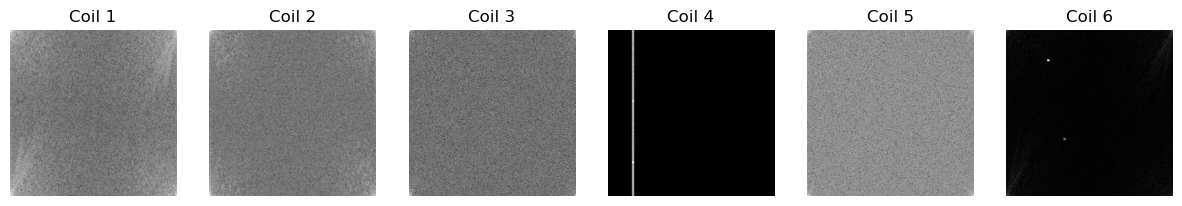

In [2]:
# Exercise 2.1. - show all coils in K-space
import matplotlib.pyplot as plt

# Compute magnitude for visualization
kspace_magnitude = np.abs(kspace)

# Number of coils
num_coils = kspace.shape[0]

# Plot k-space magnitude for each coil
fig, axes = plt.subplots(1, num_coils, figsize=(15, 5))
for i in range(num_coils):
    axes[i].imshow(np.log1p(kspace_magnitude[i]), cmap='gray')
    axes[i].set_title(f'Coil {i+1}')
    axes[i].axis('off')

plt.show()


In [3]:
# Exercise 2.1.
# Apply Inverse Fourier Transform along the last two dimensions
image_space = np.fft.ifft2(kspace, axes=(-2, -1))


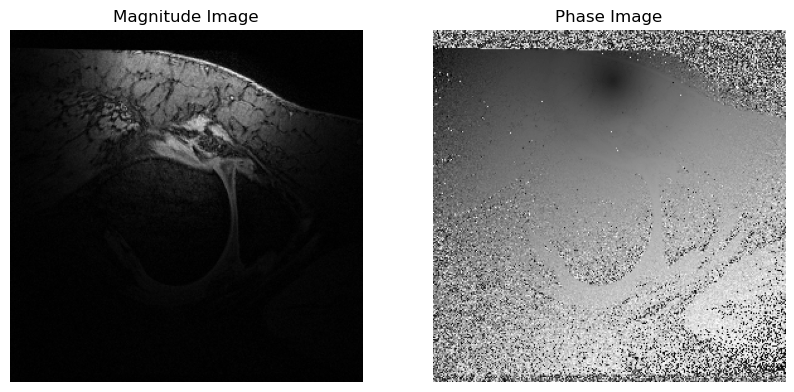

In [8]:
# Exercise 2.1. - one magnitude image and one phase image from first coil
# Choose one coil for visualization
coil_index = 0  
image_magnitude = np.abs(image_space[coil_index])
image_phase = np.angle(image_space[coil_index])

# Display magnitude and phase images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_magnitude, cmap='gray')
ax[0].set_title("Magnitude Image")
ax[0].axis("off")

ax[1].imshow(image_phase, cmap='gray')
ax[1].set_title("Phase Image")
ax[1].axis("off")
plt.savefig("Mag_Phase_Coil")
plt.show()


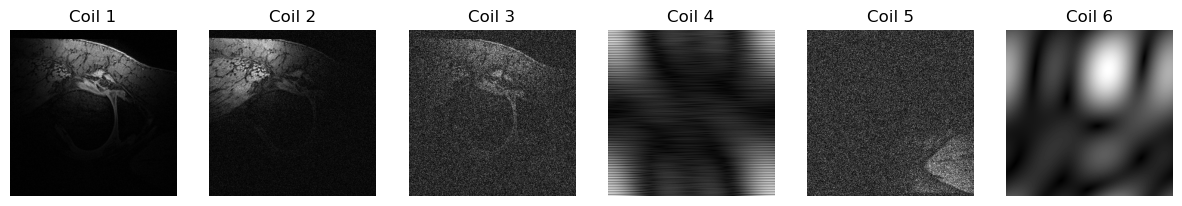

In [6]:
# Exercise 2.1. - show all mangitude images
fig, axes = plt.subplots(1, num_coils, figsize=(15, 5))
for i in range(num_coils):
    axes[i].imshow(np.abs(image_space[i]), cmap='gray')
    axes[i].set_title(f'Coil {i+1}')
    axes[i].axis('off')

plt.show()


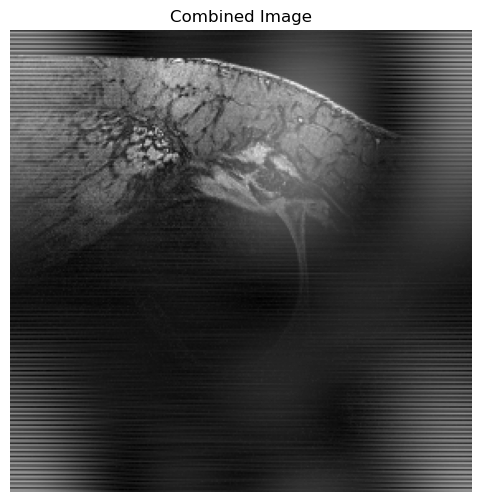

In [10]:
# Exercise 2.1. - combined image 
# Compute Root Sum of Squares (RSS)
combined_image = np.sqrt(np.sum(np.abs(image_space) ** 2, axis=0))

# Display the final combined image
plt.figure(figsize=(6, 6))
plt.imshow(combined_image, cmap='gray')
plt.title("Combined Image")
plt.axis("off")
plt.savefig("Combined_image")
plt.show()


In [24]:
# Exercise 2.2. Denoising methods 
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.restoration import denoise_bilateral, denoise_wavelet

# Convert complex image data to magnitude images
image_magnitude = np.abs(image_space)

num_coils = image_magnitude.shape[0]

# Create empty arrays to store denoised images
gaussian_denoised = np.zeros_like(image_magnitude)
bilateral_denoised = np.zeros_like(image_magnitude)
wavelet_denoised = np.zeros_like(image_magnitude)

# Apply filters to each coil's image
for i in range(num_coils):
    # Gaussian filter (sigma controls smoothness)
    gaussian_denoised[i] = gaussian_filter(image_magnitude[i], sigma=1)

    # Bilateral filter (preserves edges) - Now works on real-valued images
    bilateral_denoised[i] = denoise_bilateral(image_magnitude[i], sigma_color=0.1, sigma_spatial=5, channel_axis=None)

    # Wavelet denoising (removes noise without blurring)
    wavelet_denoised[i] = denoise_wavelet(image_magnitude[i], method='BayesShrink', mode='soft', rescale_sigma=True)


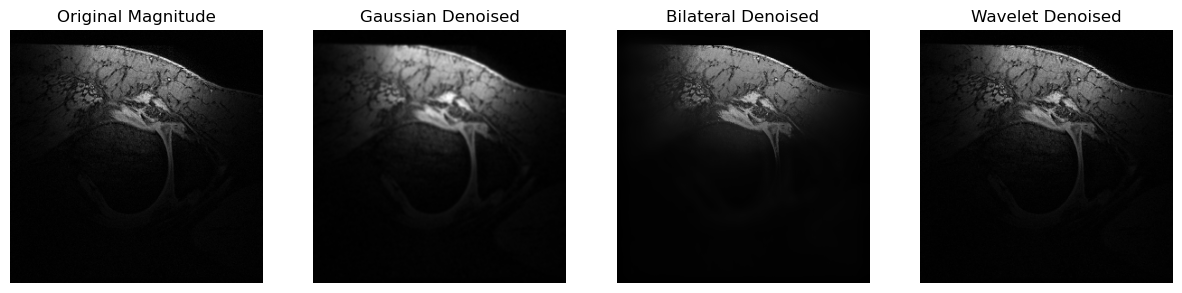

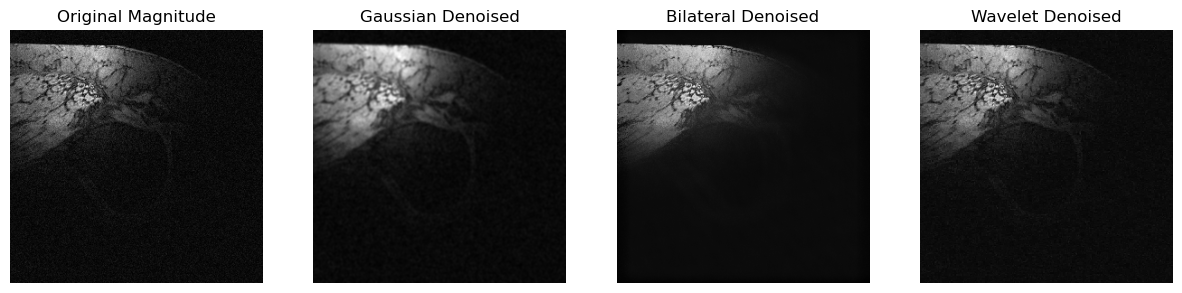

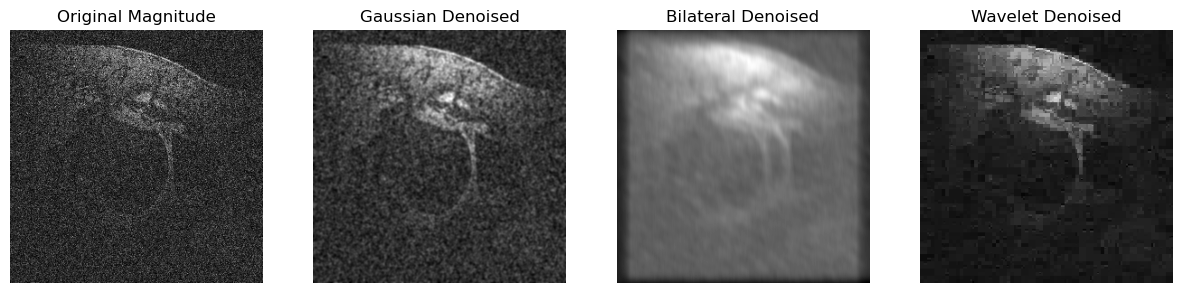

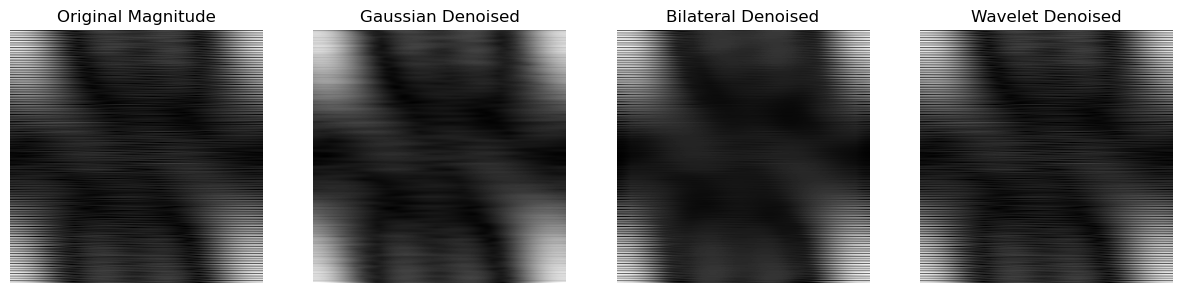

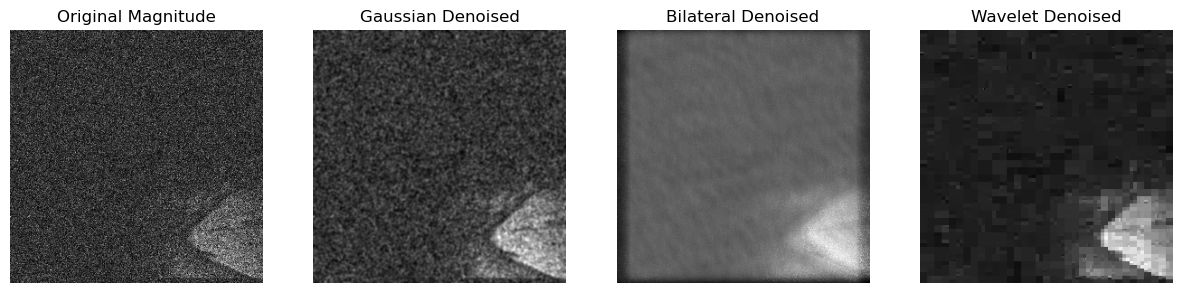

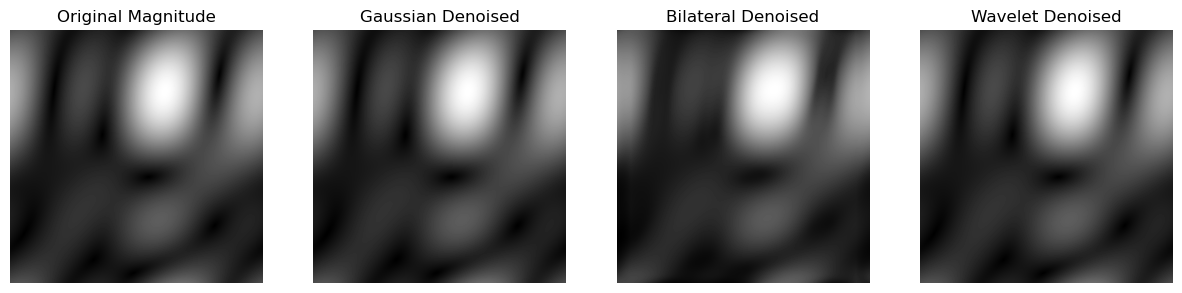

In [25]:
# Exercise 2.2.
# Display the original coils with all three denoised images 
for i in range(num_coils):

  fig, axes = plt.subplots(1, 4, figsize=(15, 5))
  axes[0].imshow(image_magnitude[i], cmap='gray')
  axes[0].set_title('Original Magnitude')

  axes[1].imshow(gaussian_denoised[i], cmap='gray')
  axes[1].set_title('Gaussian Denoised')

  axes[2].imshow(bilateral_denoised[i], cmap='gray')
  axes[2].set_title('Bilateral Denoised')

  axes[3].imshow(wavelet_denoised[i], cmap='gray')
  axes[3].set_title('Wavelet Denoised')

  for ax in axes:
      ax.axis('off')

  plt.show()


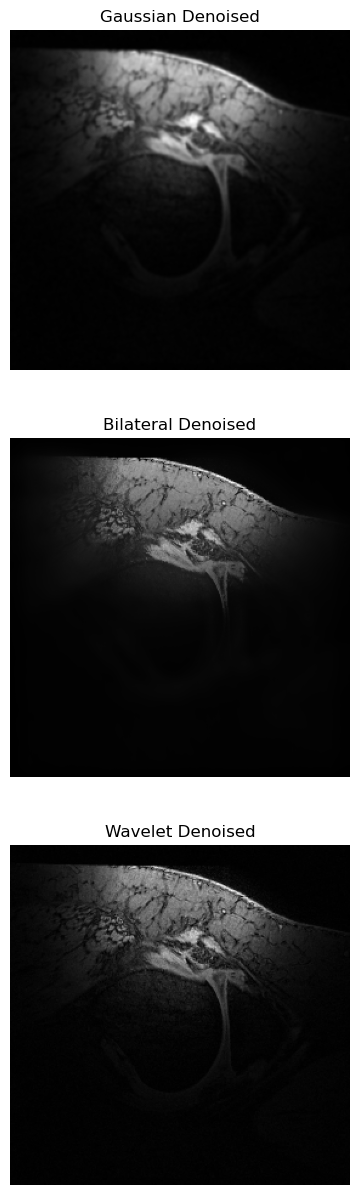

In [31]:
# Exercise 2.2.
# Just taking the denoised images of the first coil and saving it as a figure 
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

axes[0].imshow(gaussian_denoised[0], cmap='gray')
axes[0].set_title('Gaussian Denoised')

axes[1].imshow(bilateral_denoised[0], cmap='gray')
axes[1].set_title('Bilateral Denoised')

axes[2].imshow(wavelet_denoised[0], cmap='gray')
axes[2].set_title('Wavelet Denoised')


for ax in axes:
    ax.axis('off')
plt.savefig("Three_Denoising_Methods")
plt.show()

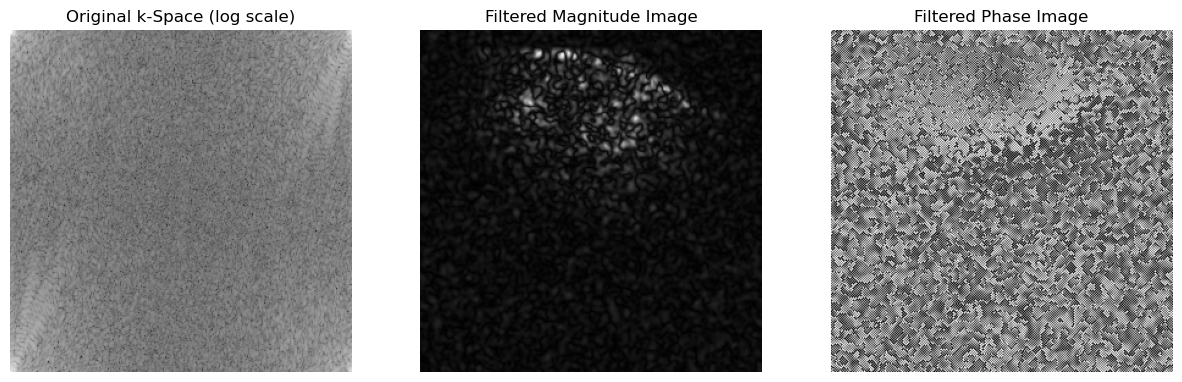

In [70]:
# Exercise 2.2. - Butterworth filter 
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft2, fftshift, ifftshift

# Function for Butterworth Low-Pass Filter
def butterworth_lowpass_filter(shape, D0=30, n=2):
    P, Q = shape[0], shape[1]
    u = np.arange(P) - P // 2
    v = np.arange(Q) - Q // 2
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / D0) ** (2 * n))
    return H

# Load k-space data 
kspace_coil1 = kspace[0]  # First coil

# Apply the Butterworth filter in k-space
H = butterworth_lowpass_filter(kspace_coil1.shape, D0=30, n=2)
filtered_kspace = kspace_coil1 * H  # Apply the filter

# Transform back to image space
filtered_image = ifft2(filtered_kspace)  # Inverse Fourier Transform
filtered_magnitude = np.abs(filtered_image)
filtered_phase = np.angle(filtered_image)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(np.log1p(np.abs(kspace_coil1)), cmap='gray')
axes[0].set_title('Original k-Space (log scale)')

axes[1].imshow(filtered_magnitude, cmap='gray')
axes[1].set_title('Filtered Magnitude Image')

axes[2].imshow(filtered_phase, cmap='gray')
axes[2].set_title('Filtered Phase Image')

for ax in axes:
    ax.axis('off')
plt.show()


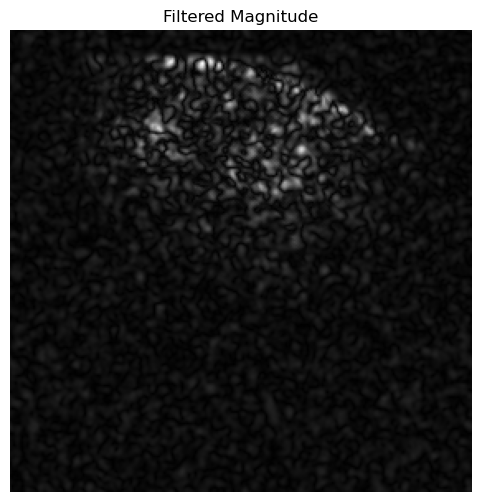

In [55]:
# Exercise 2.2.
# Display the filtered magnitude image 
plt.figure(figsize=(6, 6))
plt.imshow(filtered_magnitude, cmap='gray')
plt.title("Filtered Magnitude")
plt.axis("off")
plt.savefig("Filtered_Magnitude")
plt.show()

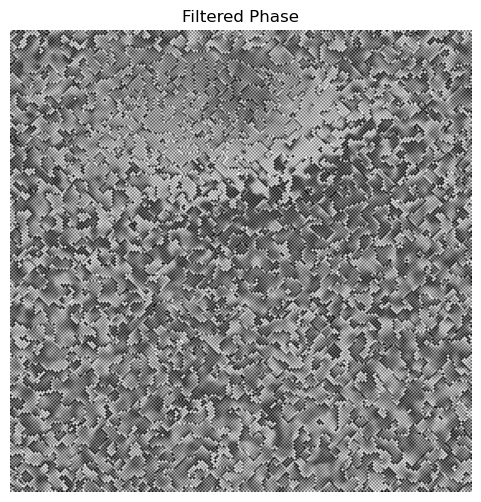

In [57]:
# Exercise 2.2.
# Display the filtered phase image 
plt.figure(figsize=(6, 6))
plt.imshow(filtered_phase, cmap='gray')
plt.title("Filtered Phase")
plt.axis("off")
plt.savefig("Filtered_Phase")
plt.show()

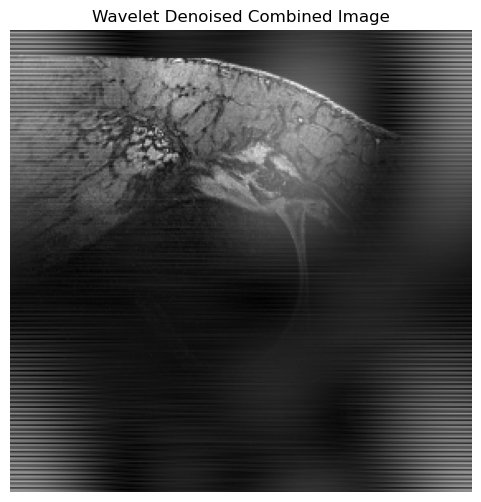

In [77]:
# Exercise 2.2.
# Convert k-space to magnitude images (real-valued)
image_magnitude = np.abs(image_space)  # Take magnitude to remove complex component

# Apply Wavelet denoising to each coil
denoised_images = np.zeros_like(image_magnitude)
for i in range(image_magnitude.shape[0]):  # Loop over each coil
    denoised_images[i] = denoise_wavelet(image_magnitude[i], method='BayesShrink', mode='soft', rescale_sigma=True)

# Compute the new combined image using RSS
combined_denoised_image = np.sqrt(np.sum(np.abs(denoised_images) ** 2, axis=0))

# Display the final combined image
plt.figure(figsize=(6, 6))
plt.imshow(combined_denoised_image, cmap='gray')
plt.title("Wavelet Denoised Combined Image")
plt.axis("off")
plt.savefig("Wavelet_Denoised_Combined_Image")
plt.show()
